<a href="https://colab.research.google.com/github/naoto-tomita/report_MethodologyofMathematicalandComputationalAnalysis/blob/main/Q1_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 数理情報分析基礎 I 　レポート課題

東京工業大学 環境・社会理工学院　<br>
技術経営専門職学位課程　１年<br>
21M52930 冨田直人<br>



---



## このレポートについて

- 以下では、講義で取り扱われたトピック「データ可視化と統計分析：データを可視化し、統計的に処理するための理論と方法を理解する」を深掘りする形で、データの可視化を行います。

- テーマとしては、日本のスタートアップにおける資金調達がどのように行われてきたか、ということを複数の視点から分析・可視化して示唆を得ることを試みます（私は東工大関連のスタートアップ企業を運営しており、スタートアップに関するトピックに興味があるため、Kaggleで関連するデータセットを探しました）。

- 具体的に、Kaggleにアップされているデータセット（下記参照）を利用して、分析自体は、N. Peker Çelik氏の分析データ（https://www.kaggle.com/ecicek/data-exploration-and-basic-preprocessing)
を参考に、分析対象を日本に絞る形でアレンジして分析を行いました。

- 本レポートの最後の方に、講義に関する感想を記述しています。



---



##データセットについて



- データセットの場所は、以下の通りです。

> StartUp Investments (Crunchbase): https://www.kaggle.com/arindam235/startup-investments-crunchbase



- 今回使用したデータセットはKaggleからダウンロードしたものですが、データのソースは "a platform for finding business information about private and public companies "という名前のCrunchbaseのデータです。



- このデータセットは、主に世界における２０１４年までのスタートアップの投資に関する財務データ(約5万行）で構成されており、それぞれの投資において、以下の要素を含んでいます。この中の日本のスタートアップのデータを活用します。
  - スタートアップ名
  - url
  - 市場セグメント／カテゴリー（例：ソフトウェア、バイオテクノロジー、ヘルス＆フィットネス、不動産、検索、モバイル、教育、輸送、金融など）
  - 企業のステータス(運営中、買収、クローズ・閉鎖)
  - 所在地： 国、都市、地域
  - 資金調達：資金総額（米ドル）、資金調達の種類（公的助成金、シード、エンジェル、借金、ベンチャーキャピタル)




---



## *実行内容*



### データの下準備

まず、必要なライブラリなどをインポートします。

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

#itertools
import itertools

#to suppress un-necessary warnings
import warnings  
warnings.filterwarnings('ignore')

Kaggleからダウンロードしたファイルをアップロードし、読み込ませ、列の名前を修正します。

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving investments_VC.csv to investments_VC.csv


In [ ]:
df = pd.read_csv('investments_VC.csv', encoding= 'unicode_escape')
df.rename(columns = {' market ': 'market', ' funding_total_usd ': 'funding_total_usd'}, inplace = True)

５４２９４行のデータであることがわかります。

In [ ]:
print(len(df))
df.head()

54294


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


データの下準備を行い、日本のものに絞ります。

In [ ]:
df.drop(df[df['funding_total_usd'] == ' -   '].index,inplace=True)
df['funding_total_usd'] = df['funding_total_usd'].str.replace(",","")
df.dropna( axis=0,subset=['funding_total_usd'],inplace = True) and df.dropna( axis=0,subset=['market'],inplace = True)
df.drop('homepage_url', inplace = True, axis = 1)
df['funding_total_usd']=df['funding_total_usd'].astype('int')
marketdf = df[['market','name','funding_total_usd','status']]

In [ ]:
df_jpn = df.query('country_code == "JPN"')

日本のスタートアップ210件について今回は分析を行います。

In [ ]:
df_jpn.head()

,permalink,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
247,/organization/3rdkind,3rdKind,|Game|,Game,1000000,operating,JPN,NaN,Tokyo,Tokyo,1.0,NaN,NaN,NaN,NaN,2014-07-29,2014-07-29,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
291,/organization/4meee,4meee,|E-Commerce|,E-Commerce,500000,operating,JPN,NaN,Tokyo,Tokyo,1.0,NaN,NaN,NaN,NaN,2014-08-13,2014-08-13,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,/organization/7-bites,7-bites,|Enterprise Software|,Enterprise Software,295000,operating,JPN,NaN,JPN - Other,NaN,1.0,NaN,NaN,NaN,NaN,2013-06-27,2013-06-27,295000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,/organization/accounting-saas-japan,Accounting SaaS Japan,|Cloud Computing|SaaS|,SaaS,8500000,operating,JPN,NaN,Tokyo,Tokyo,2.0,2009-06-01,2009-06,2009-Q2,2009.0,2013-06-01,2014-11-25,0.0,8500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8500000.0,0.0,0.0,0.0,0.0,0.0,0.0
1077,/organization/adinnovation,AdInnovation,|Mobile|,Mobile,1600000,operating,JPN,NaN,Tokyo,Tokyo,1.0,2010-03-15,2010-03,2010-Q1,2010.0,2013-07-04,2013-07-04,0.0,1600000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_jpn.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,2.100000e+02,210.000000,163.000000,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.0,2.100000e+02,2.100000e+02,210.0,2.100000e+02,210.0,210.0,210.0,210.000000,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.0,210.0,2.100000e+02
mean,1.379331e+07,1.671429,2008.251534,3.584200e+05,6.294979e+06,2.761905e+04,2.827613e+05,0.0,1.050946e+04,2.539380e+04,0.0,6.792381e+06,0.0,0.0,0.0,1247.619048,1.116735e+06,1.434981e+06,6.385714e+05,3.871429e+05,4.281317e+05,0.0,0.0,2.190476e+04
std,4.995133e+07,1.049786,8.985821,7.503586e+05,1.508253e+07,4.002380e+05,3.607172e+06,0.0,1.383127e+05,1.386576e+05,0.0,4.853255e+07,0.0,0.0,0.0,18079.717655,3.073910e+06,4.620765e+06,4.662318e+06,4.024931e+06,3.664213e+06,0.0,0.0,3.174302e+05
min,1.000000e+03,1.000000,1912.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
25%,5.000000e+05,1.000000,2008.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
50%,1.959792e+06,1.000000,2010.000000,0.000000e+00,9.850000e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
75%,5.760000e+06,2.000000,2012.000000,3.450000e+05,5.000000e+06,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.000000,2.930328e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
max,5.400000e+08,7.000000,2014.000000,5.000000e+06,1.430077e+08,5.800000e+06,5.206522e+07,0.0,2.000000e+06,1.266040e+06,0.0,5.400000e+08,0.0,0.0,0.0,262000.000000,2.000000e+07,3.600000e+07,5.950000e+07,5.520000e+07,3.990766e+07,0.0,0.0,4.600000e+06


In [ ]:
df_jpn = df_jpn.drop_duplicates()
print(df_jpn.shape)

(210, 38)


### データの可視化

以下ではデータの可視化を実行します。
まず、必要なライブラリをインポートします。

In [ ]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud
from numpy import median

#### マーケットの分類

以下でマーケット別のスタートアップの数を棒グラフで表示させます。

In [ ]:
marketdf = df_jpn[['market','name','funding_total_usd','status']]

Text(0.5, 1.0, 'Amount of startup by Markets')

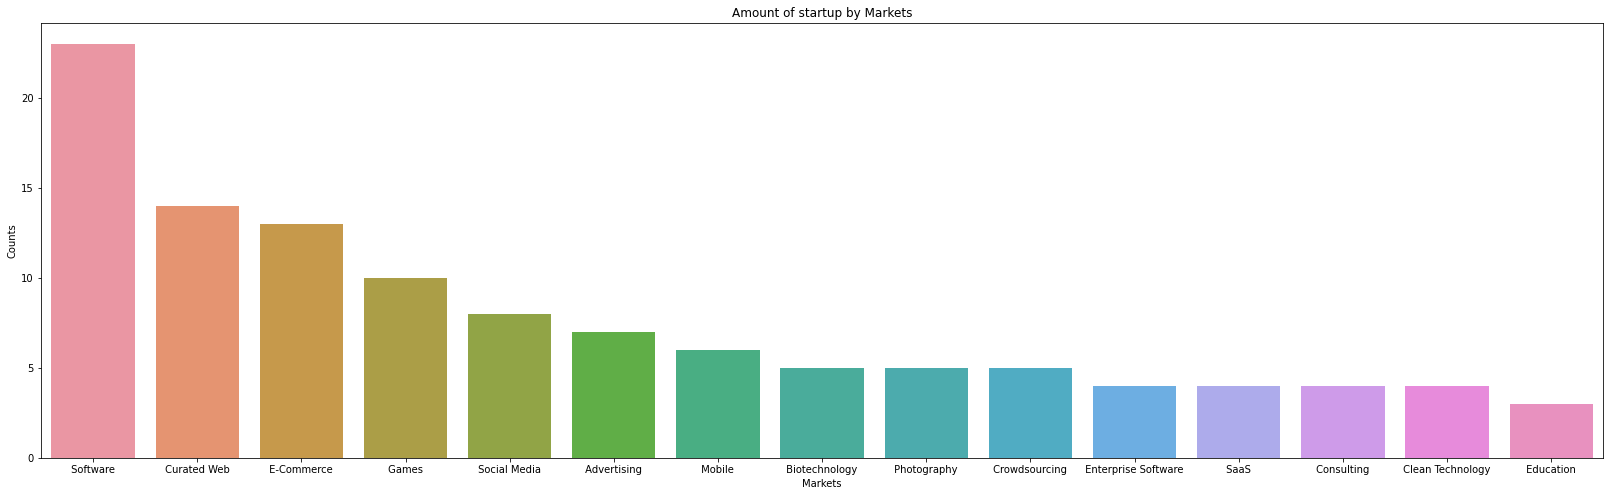

In [ ]:
plt.figure(figsize=(28,8))
sns.countplot(x='market',data=df_jpn, order=df_jpn['market'].value_counts().iloc[:15].index)
plt.xlabel('Markets')
plt.ylabel('Counts')
plt.title('Amount of startup by Markets')

全世界での分布は以下の通りなので、比較してみてみると、日本ではキュレーションメディアが多く、バイオテクノロジーが少ないことがわかります。当時は、MERYやiemoなどの人気キュレーションメディアが誕生していたことを考えると、肌感にも合っています。

ソース：https://www.kaggle.com/ecicek/data-exploration-and-basic-preprocessing


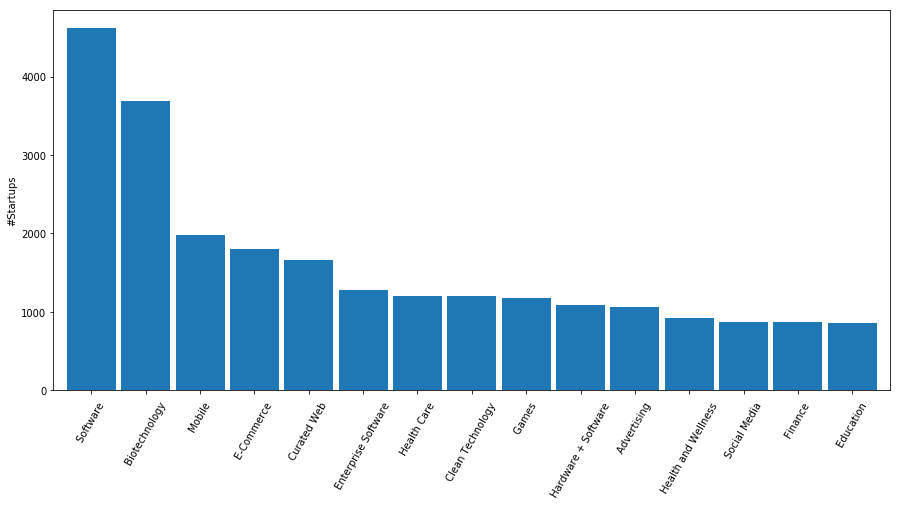

ワードクラウドの形で可視化すると以下の通りになります。

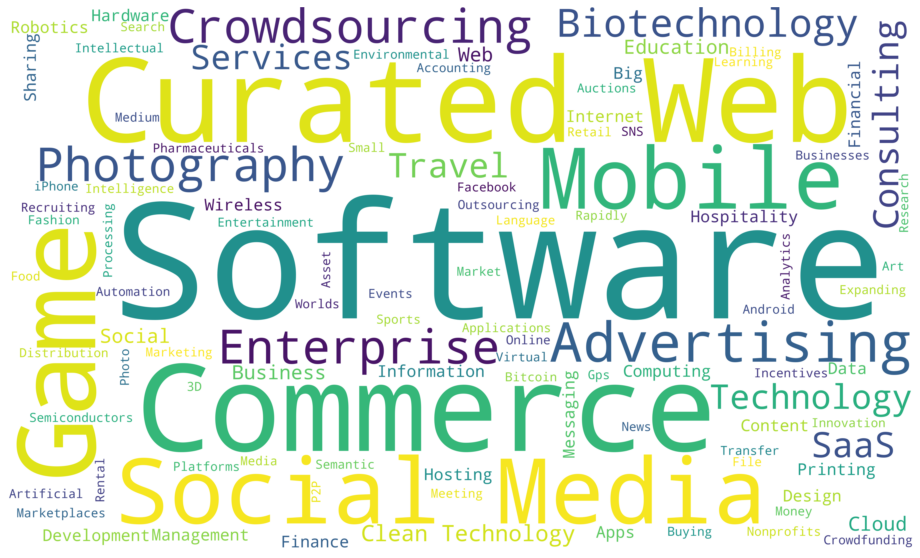

In [ ]:
mark=marketdf['market']
mark.dropna(inplace=True)
wordcloud = WordCloud(background_color = 'white',width = 5000,height = 3000).generate(" ".join(mark))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis('off') 
plt.show()

#### 企業のステータス(運営中、買収、クローズ・閉鎖)


In [ ]:
totalmoney = marketdf.groupby(['market']).sum()
topmarkets= pd.DataFrame({'market':marketdf['market'].value_counts().iloc[:15].index})
largem=marketdf.merge(topmarkets,how='inner',on='market')
data_=df_jpn.merge(topmarkets,how='inner',on='market')
topmarkets=topmarkets.merge(totalmoney,how='inner', on='market')
datacntry = df_jpn.drop(columns=['permalink','name','category_list','region','city','secondary_market','product_crowdfunding','founded_at','founded_quarter','founded_year','first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market','funding_rounds', 'founded_month'])
data_.drop(columns=['permalink','name','category_list','country_code','region','city','secondary_market','product_crowdfunding','founded_at','founded_quarter','founded_year','first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market','funding_rounds', 'founded_month',],inplace=True)

以下のコードで、データ収集時において、収集したデータに含まれるスタートアップがどのようなステータス（運営中・売却・クローズ）にあるのか、を可視化します。

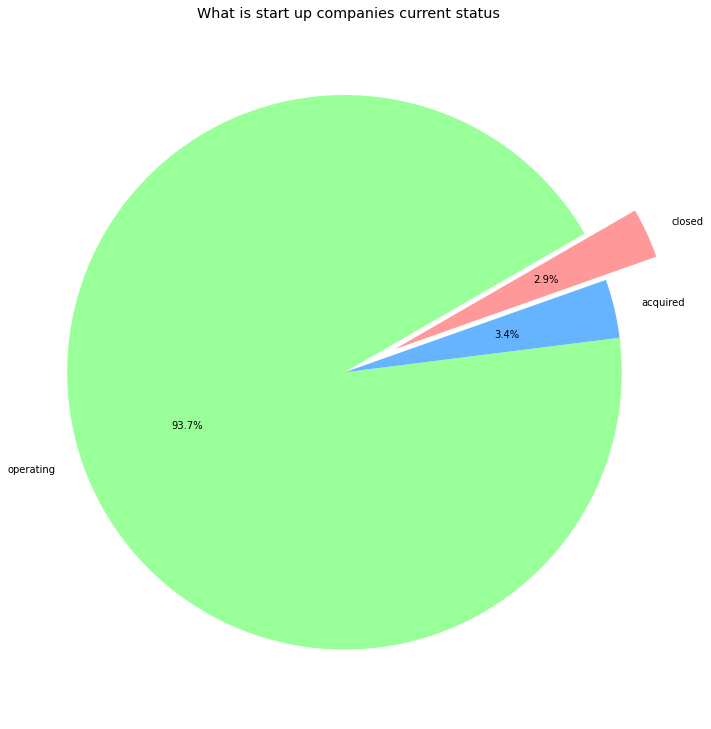

In [ ]:
plt.rcParams['figure.figsize'] = 10,10
labels = df_jpn['status'].value_counts().index.tolist()
sizes = df_jpn['status'].value_counts().tolist()
explode = (0, 0, 0.2)
colors = ['#99ff99','#66b3ff','#ff9999']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.48,1], size = 'x-large')
plt.show()

データ収集時において、収集したデータに含まれるスタートアップのうち、3.4パーセントの企業が買収され、2.9パーセントがクローズしてしまい、残りが運営中だったということがわかります。これらを左右した要素として、資金調達の内容が挙げられるか、という点について、分析をすると面白いと思います（サンプル数が少ないので、最新データを追加すると良いかもしれません）。

#### マーケット別の資金調達の規模(中央値）


マーケット別に資金調達の規模（中央値）を表示させると、以下の通りになります。

Text(0.5, 1.0, 'Total invesments per market')

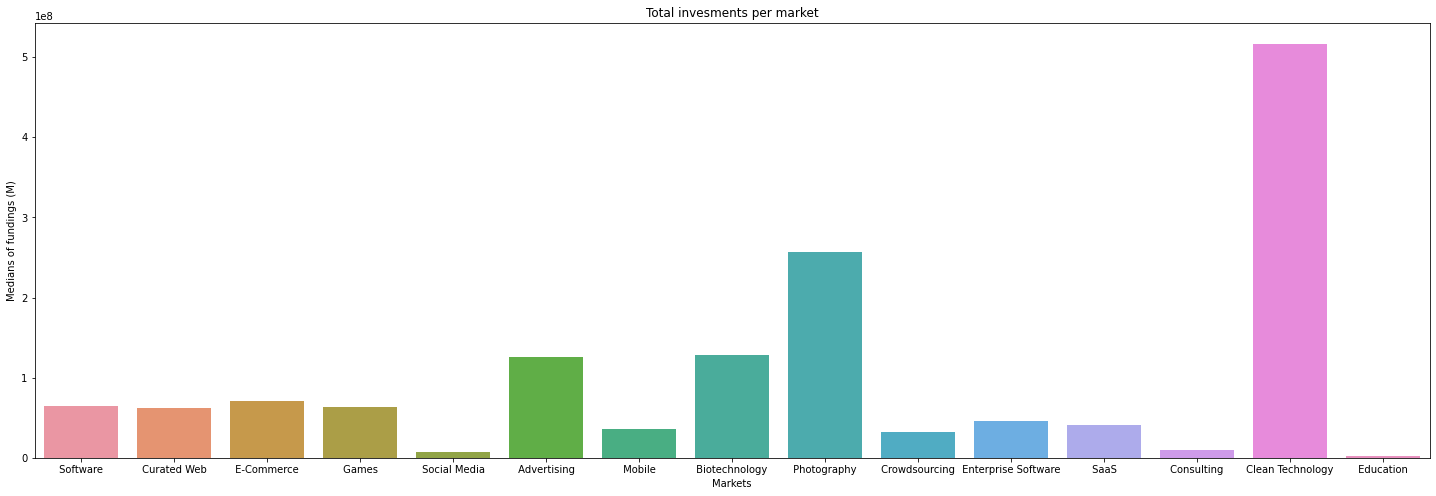

In [ ]:
plt.figure(figsize=(25,8))
sns.barplot(x='market',y= 'funding_total_usd',data = topmarkets)
plt.xlabel('Markets')
plt.ylabel('Medians of fundings (M)')
plt.title('Total invesments per market')

マーケットによってはサンプル数が少ないことを考慮する必要がありますが、上記のマーケット別の資金調達を行なった規模（企業の数）を考えても、意外な結果だと感じました。キュレーションメディアなどと比べ、クリーンテクノロジーなどの方が初期の事業に必要な投資の額が大きい可能性はありますが、キュレーションメディアなどもマーケティングのために多くの額を必要になる/調達できると思われるためです。

参考のために、総調達額の大きなTOP１０のスタートアップを表示すると、Clean TechnolgyではEurus Energy HoldingsとNippon Renewable Energyが、PhotographyではUSJが牽引していることがわかります。

In [ ]:
df_jpn.sort_values(by='funding_total_usd', ascending=False).head(10)

,permalink,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
25030,/organization/m-setek,M.Setek,|Design|Semiconductors|,Design,540000000,operating,JPN,NaN,Tokyo,Tokyo,1.0,1978-01-01,1978-01,1978-Q1,1978.0,2010-01-29,2010-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14150,/organization/eurus-energy-holdings,Eurus Energy Holdings,|Clean Technology|,Clean Technology,266400000,operating,JPN,NaN,Tokyo,Minato,1.0,2001-01-01,2001-01,2001-Q1,2001.0,2010-01-29,2010-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45061,/organization/universal-studios-japan,Universal Studios Japan,|Photography|,Photography,250000000,operating,JPN,NaN,JPN - Other,NaN,1.0,NaN,NaN,NaN,NaN,2013-12-13,2013-12-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29303,/organization/nippon-renewable-energy,Nippon Renewable Energy,|Clean Technology|,Clean Technology,250000000,operating,JPN,NaN,Tokyo,Tokyo,1.0,NaN,NaN,NaN,NaN,2014-01-28,2014-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6397,/organization/brightcove,Brightcove,|Technology|Analytics|Video|Enterprise Software|,Technology,143007658,operating,JPN,NaN,Tokyo,Shibuya,7.0,2004-01-01,2004-01,2004-Q1,2004.0,2005-03-01,2014-02-10,0.0,143007658.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5500000.0,21200000.0,59500000.0,16900000.0,39907658.0,0.0,0.0,0.0
37919,/organization/sharp-corporation,Sharp Corporation,|Hardware + Software|,Hardware + Software,120000000,operating,JPN,NaN,Tokyo,Tokyo,2.0,1912-01-01,1912-01,1912-Q1,1912.0,2012-01-01,2013-06-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34927,/organization/reachlocal,ReachLocal,|Semantic Search|SEO|Social Media|Sales and Ma...,Advertising,99585670,operating,JPN,NaN,Tokyo,Tokyo,7.0,2004-01-01,2004-01,2004-Q1,2004.0,2004-03-01,2010-01-29,0.0,99585670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000.0,7000000.0,5000000.0,55200000.0,0.0,0.0,0.0,0.0
40469,/organization/star-festival,STAR FESTIVAL,|Cooking|E-Commerce|Online Shopping|Distributi...,Distribution,54800000,operating,JPN,NaN,Tokyo,Tokyo,2.0,NaN,NaN,NaN,NaN,2014-07-05,2014-07-14,0.0,54800000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39690,/organization/sosei,Sosei,|Biotechnology|,Biotechnology,52065215,operating,JPN,NaN,Tokyo,Tokyo,1.0,NaN,NaN,NaN,NaN,2004-09-01,2004-09-01,0.0,0.0,0.0,52065215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13064,/organization/egenera-inc,Egenera,|Cloud Management|Enterprise Software|,Enterprise Software,44000000,operating,JPN,NaN,Tokyo,Tokyo,3.0,2000-01-01,2000-01,2000-Q1,2000.0,2006-08-14,2014-06-06,0.0,42000000.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000000.0,0.0,0.0,0.0


### まとめ

- データの可視化を通じて、体感に合う部分と予想外の部分が見られたことは興味深いと感じました。またそれらの背景に関しての深掘りなどを行なっても面白いと思いました。

- また、このデータセットについても、今回直接使わなかった列データを用いての分析、例えば、各ステージごとの資金調達がその後の企業ステータスに与える影響、なども分析できると更に多くの示唆が得られると思います。

- データが2014年までに収集されたものなので、最新のデータを加えて更新できると、アウトプットの質も高められると思われます。


## 講義の感想

- 講義の中において、ただ聴くだけでなく、実際に手を動かしながらデータサイエンスを学んだことが、学びの質を高めることに繋がったと感じました。

- 私はプログラミングの経験が少しだけあったため、特に大きな苦労をすることなく、講義についていくことができましたが、学生によってはペースが早いと感じている方もいるような印象でした

- 一方で、結果的に、学生同士でわからないところをSlack上で教え合うなど、リモート環境下でも、他の講義では比較的見られない積極的なコミュニケーションが発生していたので、クラスとしての一体感は高まっている印象もありました

- 外部講師の方のお話は普段聞くことのできないもので、大学院に入ってよかったと感じる１つの経験でした。